In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as pltv
import gower
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [2]:
df = pd.read_pickle("../data/processed.pkl")
categorical_columns = df.select_dtypes(include=['category']).columns

In [3]:
# with open("../data/data_element_details.pkl", "rb") as file:
#     data_element_details = pickle.load(file)

In [4]:
# keep_cols = []
# for value in data_element_details.values():
#     if value['Section Name'] in ["Health Care Access", "Chronic Health Conditions"] and value['Label'] in df.columns:
#         keep_cols.append(value['Label'])
# df = df[keep_cols]

In [5]:
import pandas as pd
import prince

# Load the dataset
data = df

# Select the categorical columns for MCA
mca_columns = categorical_columns  # Replace with your categorical column names

# Create an instance of the MCA class
mca = prince.MCA(
    n_components=30,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit the MCA model to the data
mca.fit(data[mca_columns])

MCA(n_components=30, n_iter=3, random_state=42)

In [6]:
row_coords = mca.row_coordinates(df)

Attempt 0: k=2
silhouette_avg=0.17944969526223747
Attempt 1: k=3
silhouette_avg=0.11594242847195937
Attempt 2: k=4
silhouette_avg=0.09348112213732576
Attempt 3: k=5
silhouette_avg=0.05384364747417288
Attempt 4: k=6
silhouette_avg=0.12798481960391828
Attempt 5: k=7
silhouette_avg=0.09634872906935309
Attempt 6: k=8
silhouette_avg=0.11683982824975948
Attempt 7: k=9
silhouette_avg=0.12188245405006304
Attempt 8: k=10
silhouette_avg=0.16271097229823697
Attempt 9: k=11
silhouette_avg=0.14681926129250583
Attempt 10: k=12
silhouette_avg=0.09346061258091196
Attempt 11: k=13
silhouette_avg=0.16994115693867465
Attempt 12: k=14
silhouette_avg=0.1639801870070108
Attempt 13: k=15
silhouette_avg=0.11663061641234536
Attempt 14: k=16
silhouette_avg=0.1331485449921574
Attempt 15: k=17
silhouette_avg=0.15761769209693993
Attempt 16: k=18
silhouette_avg=0.11917826304610012
Attempt 17: k=19
silhouette_avg=0.13537490439441174
The optimal number of clusters based on Silhouette Score is 2


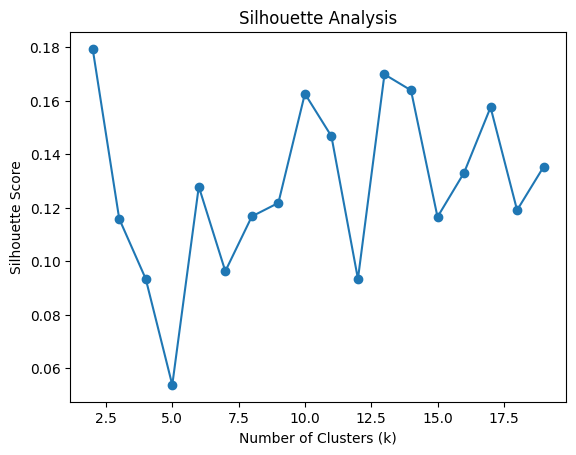

Cluster Labels (Optimal): [1 1 1 ... 0 0 0]
Cluster Centroids (Optimal): [[ 0.09716166 -0.1009972  -0.03111693  0.00196749 -0.01110161  0.03612168
   0.00614359  0.01348414  0.00546535 -0.01778229  0.00536584 -0.01066925
   0.01094866 -0.00066006 -0.00338954  0.0084996  -0.00126317 -0.00521259
  -0.00133462  0.00308086  0.00043888  0.00421942 -0.00233033  0.00301844
   0.00160356  0.00489522 -0.0067937  -0.00229219 -0.00533846  0.00089608]
 [-0.32788702  0.39975721  0.08767473 -0.01013983  0.04914316 -0.09685978
  -0.03351327 -0.03708186 -0.00091873  0.04033146  0.0154252   0.06348139
  -0.00255679 -0.01451012  0.00794242 -0.01917855 -0.0025058  -0.01723472
  -0.01527169  0.01404971  0.00071659  0.00271882  0.00334583 -0.00329588
   0.00318794 -0.00270166  0.00727584 -0.00102016 -0.00721767  0.00052294]]


In [7]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Specify the range of k values to try
k_values = range(2, 20)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over each k value
for i, k in enumerate(k_values):
    print(f"Attempt {i}: k={k}")
    # Create a MiniBatchKMeans object with the current k value
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
    
    # Fit the model to the MCA row coordinates
    mbk.fit(row_coords)
    
    # Get the cluster labels for each data point
    labels = mbk.labels_
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(row_coords, labels)
    print(f"silhouette_avg={silhouette_avg}")
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("The optimal number of clusters based on Silhouette Score is", optimal_k)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Create a MiniBatchKMeans object with the optimal k value
mbk_optimal = MiniBatchKMeans(n_clusters=optimal_k, batch_size=100, random_state=42)

# Fit the model to the MCA row coordinates
mbk_optimal.fit(row_coords)

# Get the cluster labels for each data point
labels_optimal = mbk_optimal.labels_

# Get the cluster centers
centroids_optimal = mbk_optimal.cluster_centers_

# Print the cluster labels and centroids for the optimal clustering
print("Cluster Labels (Optimal):", labels_optimal)
print("Cluster Centroids (Optimal):", centroids_optimal)

In [8]:
with open('../data/silhouette_scores_3.pickle', 'wb') as handle:
    pickle.dump(silhouette_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/mbk_optimal_3.pickle', 'wb') as handle:
    pickle.dump(mbk_optimal, handle, protocol=pickle.HIGHEST_PROTOCOL)